In [47]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"]='sans'
import pandas as pd
from google.colab import files
files.upload()

Saving FIFA_test.csv to FIFA_test (1).csv
Saving FIFA_train.csv to FIFA_train (2).csv


{'FIFA_test.csv': b'id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves\r\n1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0\r\n2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0\r\n4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0\r\n5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0\r\n6,L. Modri\xc4\x87,32,europe,2020,MF,right,4.0,91,91,4.0\r\n10,R. Lewandowski,29,europe,2021,ST,right,4.0,90,90,4.0\r\n11,T. Kroos,28,europe,2022,MF,right,4.0,90,90,3.0\r\n15,P. Dybala,24,south america,2022,ST,left,3.0,89,94,4.0\r\n17,A. Griezmann,27,europe,2023,MF,left,4.0,89,90,4.0\r\n23,S. Ag\xc3\xbcero,30,south america,2021,ST,right,4.0,89,89,4.0\r\n25,K. Mbapp\xc3\xa9,19,europe,2022,MF,right,3.0,88,95,5.0\r\n28,J. Rodr\xc3\xadguez,26,south america,"Jun 30, 2019",MF,left,4.0,88,89,4.0\r\n31,C. Eriksen,26,europe,2020,MF,right,3.0,88,91,4.0\r\n35,Marcelo,30,south america,2022,DF,left,4.0,88,88,5.0\r\n39,Thiago Silva,33,sout

In [49]:
df = pd.read_csv("FIFA_train.csv")
df.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


* **INSIGHT**

  * 필요없는 값
    * 1. `id` : 선수 고유의 아이디
    * 2. `name` : 이름
  * 범주형 값
    * 4. `continent` : 선수들의 국적이 포함되어 있는 대륙입니다 (south america/europe/africa/asia/oceania)등의 (문자열 타입)
    * 5. `contract_until` : 선수의 계약기간이 언제까지인지 나타내어 줍니다 (문자열 타입)
    * 6. `position` : 선수가 선호하는 포지션입니다. (ST/GK/DF/MF)의 (문자열 타입)
    * 7. `prefer_foot` : 선수가 선호하는 발입니다. (left/right)의( 문자열타입)
    
  * 수치형 값
    * 3. `age` : 나이 (int)
    * 8. `reputation` : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수 (1,2,3,4,5)의 정수 타입
    * 9. `stat_overall` : 선수의 현재 능력치 입니다. (int)
    * 10.`stat_potential` : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.(int)
    * 11.`stat_skill_moves` : 선수의 개인기 능력치 입니다. (1,2,3,4,5)의 정수 타입
  * 예측값
    * 12. `value` :  FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다. (flaot)







* 전처리 

In [50]:
def preproces_FIFA(df):
  #필요없는 속성 제거
  drop_list = ['id','name']
  df_pre = df.drop(drop_list,axis=1)
  #결측값 행삭제
  df_pre = df_pre.dropna(axis=0)
  #이상치 제거
  for i in range(len(df_pre['contract_until'])):
    if len(df_pre['contract_until'][i])> 4:
      (df_pre['contract_until'][i])=df_pre['contract_until'][i][-4:]
    (df_pre['contract_until'][i])=int(df_pre['contract_until'][i])-2018
  #데이터 변환
  mask_s = df_pre["continent"] =='south america'
  mask_e = df_pre["continent"] =='europe'
  mask_af = df_pre["continent"] =='africa'
  mask_as = df_pre["continent"] =='asia'
  mask_o = df_pre["continent"] =='oceania'
  df_pre.loc[mask_s, "continent"] =0
  df_pre.loc[mask_e, "continent"] =1
  df_pre.loc[mask_af, "continent"] =2
  df_pre.loc[mask_as, "continent"] =3
  df_pre.loc[mask_o, "continent"] =4

  mask_sf = df_pre["position"] =='ST'
  mask_gf = df_pre["position"] =='GK'
  mask_df = df_pre["position"] =='DF'
  mask_mf = df_pre["position"] =='MF'
  df_pre.loc[mask_sf, "position"] =0
  df_pre.loc[mask_gf, "position"] =1
  df_pre.loc[mask_df, "position"] =2
  df_pre.loc[mask_mf, "position"] =3

  mask_r = df_pre["prefer_foot"] =='right'
  mask_l = df_pre["prefer_foot"] =='left'
  df_pre.loc[mask_r, "prefer_foot"] =0
  df_pre.loc[mask_l, "prefer_foot"] =1
  #이산화 하지 않음

  #min-max정규화
  for col in ['age','contract_until','reputation',	'stat_overall',	'stat_potential',	'stat_skill_moves']:
    df_pre[col] = (df_pre[col]-df_pre[col].min())/(df_pre[col].max()-df_pre[col].min())
 #Z-score정규화
 # for col in ['age','contract_until','reputation',	'stat_overall',	'stat_potential',	'stat_skill_moves']:
 #df[col] = (df[col]-df[col].median())/df[col].std()
  return df_pre

* 전처리한 데이터 y값은 따로 처리함(따로 처리해야 test데이터에 Y값이 없을때 오류가 나지 않아서입니다)

In [85]:
import math
df_train =pd.read_csv("FIFA_train.csv")
train=preproces_FIFA(df_train)

#y값인 value를 로그화 하는경우 (선택함)
train['value'] = np.log(train['value'])

#y값인 value를 정규화하는경우 (선택하지않음)
#train = (train['value']-train['value'].min())/(train['value'].max()-train['value'].min())
train.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0.608696,0,0.375,0,1,1.00,1.000000,1.000000,0.75,18.520526
1,0.434783,1,0.25,1,0,0.75,0.857143,0.952381,0.00,18.092177
2,0.608696,0,0.375,0,0,1.00,0.857143,0.857143,0.50,18.197537
3,0.652174,1,0.25,2,0,0.75,0.857143,0.857143,0.50,17.747336
4,0.347826,1,0.375,1,0,0.50,0.809524,0.952381,0.00,18.035018


* x y에 데이터 넣음

In [86]:
df=train.to_numpy()
X = df[:, :-1]
Y = df[:, -1]
X.shape, Y.shape

((1516, 9), (1516,))

* 학습

In [87]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)
W, b = model.coef_, model.intercept_
print(W, W.shape)
print(b, b.shape)

[-2.76749594e+00  2.92701748e-03 -8.63840980e-02 -2.05757082e-02
 -3.87159862e-02 -4.00502672e-02  4.63472559e+00 -1.05138712e+00
  3.70277271e-01] (9,)
16.500319328179057 ()


* 테스트 시작

In [88]:
df_train =pd.read_csv("FIFA_train.csv")
X_test = df[:, :-1]
Y_test = df[:, -1]
X_test.shape, Y_test.shape

((1516, 9), (1516,))

* MSE 구하기

In [89]:
def MSE(Y, Y_pred):
  assert len(Y)==len(Y_pred)
  
  n = len(Y)
  return (1/n) * np.sum((Y-Y_pred)**2)

Y_pred = model.predict(X_test)
MSE(Y_test, Y_pred)

0.03386351783715888

* W: [-2.27776341e+00  1.63727374e-03 -2.31712681e-02 -1.90198633e-02
 -3.44089189e-02  4.33086475e-02  3.81809037e+00 -4.01813762e-01
  3.95810248e-01] (9,)
* b: 16.200173739666436 ()
* predict: (1516,)
* MSE: 0.03682025772561106


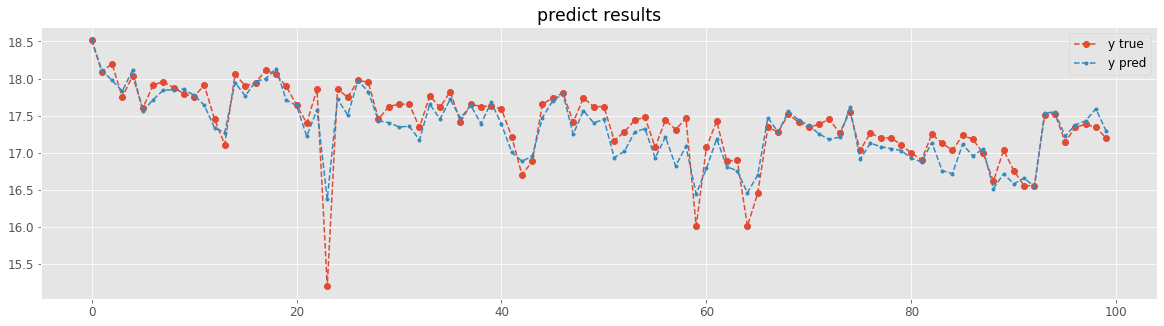

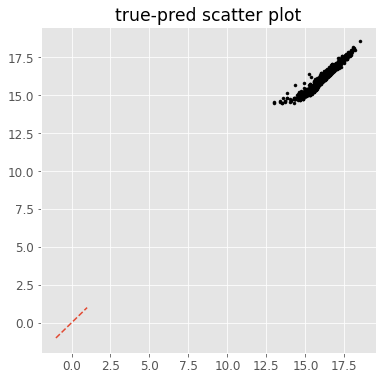

In [90]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X, Y)
W, b = model.coef_, model.intercept_
print("* W:", W, W.shape)
print("* b:", b, b.shape)

Y_pred = model.predict(X)
print("* predict:", Y_pred.shape)

error = MSE(Y, Y_pred)
print("* MSE:", error)

plt.figure(figsize=(20,5))
plt.title("predict results")
plt.plot(Y_test[:100], marker='o', linestyle='--', label='y true')
plt.plot(Y_pred[:100], marker='.', linestyle='--', label='y pred')
plt.legend()
plt.show()

plt.figure(figsize=(6,6))
plt.title("true-pred scatter plot")
plt.scatter(Y_test, Y_pred, marker='.', c='k')
plt.plot([-1,1], [-1,1], linestyle='--')
plt.show()